In [1]:
""" Snakemake Script. Don't need to import snakemake."""

import pandas as pd
from os.path import dirname, join
import numpy as np
#import click
#import snakemake
from src.utils.data_io import af_to_vireo
from icecream import ic


import seaborn as sns
import matplotlib.pyplot as plt

fig_utils from mplh


In [2]:
cells_meta = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/cells_meta.tsv"
sample = ["Input","Control","Flt3l"]
ref_mt = "/data/Mito_Trace/data/external/chrM_refAllele.txt"

# cov = ["/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Input/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Input.coverage.txt",
#        "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Control/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Control.coverage.txt",
#        "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Flt3l/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Flt3l.coverage.txt"]

# mgatk_fs = ["/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Input/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk",
#         "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Control/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk",
#         "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Flt3l/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk"]

pileup_d = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
           

# pileup_fs = ["/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0",
#             "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor1"]

# var_type="init"


# cov = snakemake.input.cov
# output_fs = snakemake.output.af
# cells_meta = snakemake.params.cells_meta
# sample = snakemake.params.sample
# ref_mt = snakemake.params.ref_mt
# var_type=snakemake.params.var_type



In [3]:
cells_meta = pd.read_csv(cells_meta , sep='\t')
#sample = sample.split(',')
ref_fa = pd.read_csv(ref_mt, sep='\t', header=None, index_col=0)

In [4]:
af_pile = pd.read_csv(join(pileup_d, f"af.tsv"), sep="\t", index_col=0)
dp_pile = pd.read_csv(join(pileup_d, f"dp.tsv"), sep="\t", index_col=0)

In [5]:
af_pile

,10397G,11812G,5147A,15452A,11761T,15607G,310C,11719A,10463C,2442C,...,146C,7598A,827G,196C,3847C,16519C,4117C,13368A,16296T,10559G
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGAATCAGT-1_Control,0.0,1.000000,1.000000,1.0,0.000000,1.000000,0.826087,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.916667,1.0,1.000000
AAACGAAAGCATACCT-1_Control,0.0,1.000000,0.952381,1.0,0.000000,1.000000,0.961538,1.000000,0.962963,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,0.913043
AAACGAAAGTACAGTA-1_Control,0.0,1.000000,0.000000,1.0,0.000000,0.933333,1.000000,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,1.000000
AAACGAAAGTGTCGGA-1_Control,0.0,0.777778,1.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,1.000000
AAACGAAGTCTTAGCA-1_Control,0.0,0.942857,1.000000,1.0,0.000000,1.000000,0.909091,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTCAATGACTC-1_Input,0.0,1.000000,0.978723,1.0,0.056338,1.000000,0.906667,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.986301,1.000000,0.954545,0.0,1.000000
TTTGTGTCAGAAAGAG-1_Input,0.0,1.000000,1.000000,1.0,0.000000,1.000000,0.917355,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.996296,1.000000,1.0,1.000000
TTTGTGTCATAGCCAT-1_Input,0.0,1.000000,1.000000,1.0,0.000000,0.983051,0.903846,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.030303,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:

# ## Remove high variants

# def get_high_variants(df, thresh, pct_thresh):
#     """ Remove rows that have an average higher than threshold

#     :param df:
#     :param thresh:
#     :return:
#     """
#     n_pct = pct_thresh*df.shape[0]
#     return df.loc[:,((df>thresh).sum()>n_pct)].columns.values


## ?Find if it's the imputation.. dont i need to do that per donor? 

## Impute the new data:
### If coverage less than 10, and >80% have coverage, then impute the median of the cells with coverage onto the low coverage cells (do i need to set depth to 10?)

In [20]:
cell_pct_cov_thresh = 0.6
cov_thresh = 10

dp_low_cov = dp_pile < cov_thresh
vars_pct_cov = dp_low_cov.sum()/dp_pile.shape[0]
filt_vars_pct_cov = vars_pct_cov[vars_pct_cov>cell_pct_cov_thresh]
filt_vars_pct_cov

Series([], dtype: float64)

In [61]:

def run_impute(af_df, dp_df, cov_thresh, cell_pct_cov_thresh):
    dp_low_cov = dp_df < cov_thresh
    vars_pct_cov = dp_low_cov.sum()/dp_df.shape[0]
    print(vars_pct_cov)
    filt_vars_pct_cov = vars_pct_cov[vars_pct_cov>cell_pct_cov_thresh]


    dp_low_cov = dp_low_cov.reset_index().melt(id_vars=["Cell"], var_name="Variant",value_name="low")
    dp_low_cov = dp_low_cov[dp_low_cov["low"]]
    dp_low_cov

    dp_var_group = dp_low_cov.groupby("Variant")


    imp_vars = set(dp_low_cov["Variant"].values)
    imp_df = af_df.copy()
    for v in imp_vars:
        if v in filt_vars_pct_cov.index:
            curr_lowc = dp_var_group.get_group(v)["Cell"].values
            #print(sum(af_df.index.isin(curr_lowc)))
            mean_v = af_df.loc[~(af_df.index.isin(curr_lowc)), v].mean()
            print('mean', mean_v)
            #print(sum(imp_df.index.isin(curr_lowc)))
            imp_df.loc[imp_df.index.isin(curr_lowc), v] = mean_v
        else:
            print('variant low coverage', v)
    return imp_df


def plot_impute(imp_df, af_df, dp_df, cov_thresh, cell_pct_cov_thresh, f_save=None):
    g_pile = sns.clustermap(imp_df)
    plt.suptitle(f"imputation with donor cov_thresh {cov_thresh} cell_pct_cov_thresh {cell_pct_cov_thresh}")
    inds = g_pile.dendrogram_row.dendrogram['leaves']
    cols = g_pile.dendrogram_col.dendrogram["leaves"]

    sns.clustermap(af_df.iloc[inds, cols], row_cluster=False, col_cluster=False)
    plt.suptitle(f"no imputation cov_thresh {cov_thresh} cell_pct_cov_thresh {cell_pct_cov_thresh}")

    sns.clustermap(np.log2(1+dp_df.iloc[inds, cols]), row_cluster=False, col_cluster=False)
    plt.suptitle(f"no imputation cov_thresh {cov_thresh} cell_pct_cov_thresh {cell_pct_cov_thresh}")
    if f_save is not None:
        plt.savefig(f_save)
    return g_pile

def impute_and_plot(af_df, dp_df, cov_thresh, cell_pct_cov_thresh, f_save=None):
    imp_df = run_impute(af_df, dp_df, cov_thresh, cell_pct_cov_thresh)
    plot_impute(imp_df, af_df, dp_df, cov_thresh, cell_pct_cov_thresh, f_save=f_save)
    return imp_df, g_pile


mean 0.007227962041809904
mean 0.9877906051262693
mean 0.006140603293840351
mean 0.9871723493645913
mean 0.9228806194538104
mean 0.9888840799062872
mean 0.9996003924385957
mean 0.001949259778245706
mean 0.008347692551803978
mean 0.006982378231352769
mean 0.9882421209973992
mean 0.009292988113179945
mean 0.009631959758432137
mean 0.98731297930783
mean 0.9866825967233731
mean 0.007540386964306957
mean 0.004724456536482324
mean 0.9997110545597209
mean 0.9865907122164924
mean 0.9989429834324033
mean 0.007851535776004757
mean 0.9873501835631938
mean 0.003368218025336915
mean 0.9892447407125045
mean 0.987523846571169
mean 0.9992502175211635
mean 0.9888787455000702
mean 0.9990116180439115
mean 0.00976459367271879
mean 0.003456013396797193
mean 0.9885853818590702
mean 0.9878931315522627
mean 0.9882716884416933
mean 0.9888706019073833
mean 0.9995776242716184
mean 0.007769060584404562
mean 0.008197504729928034
mean 0.010147607307022775
mean 0.01318769872087988
mean 0.9867013230221381
mean 0.9884

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


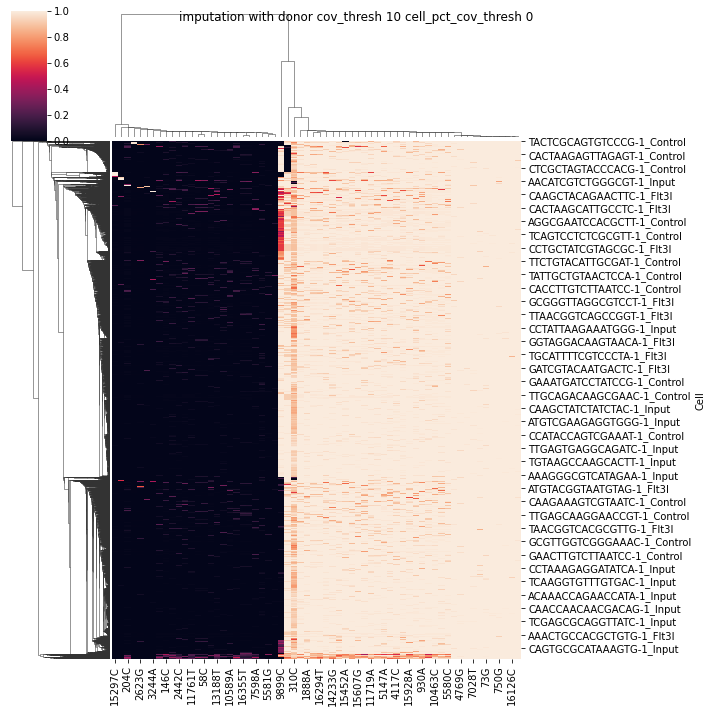

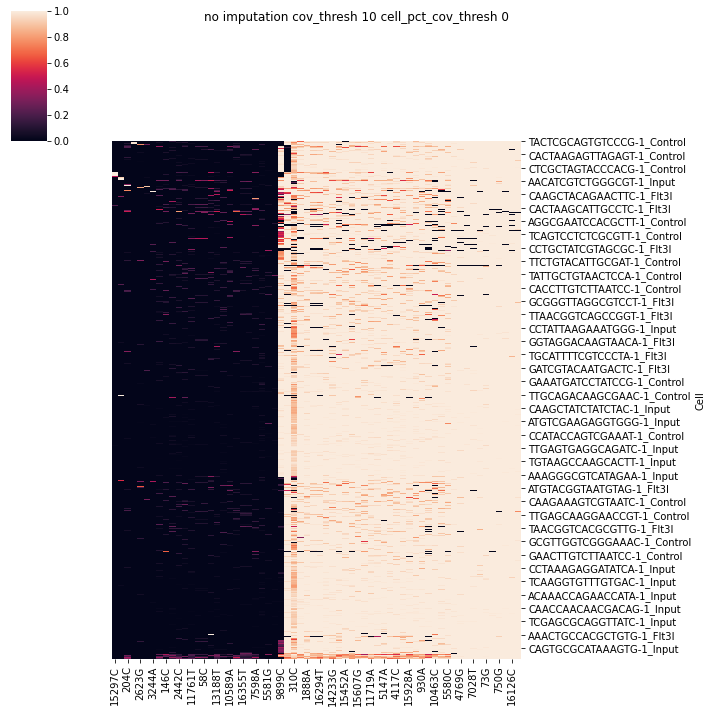

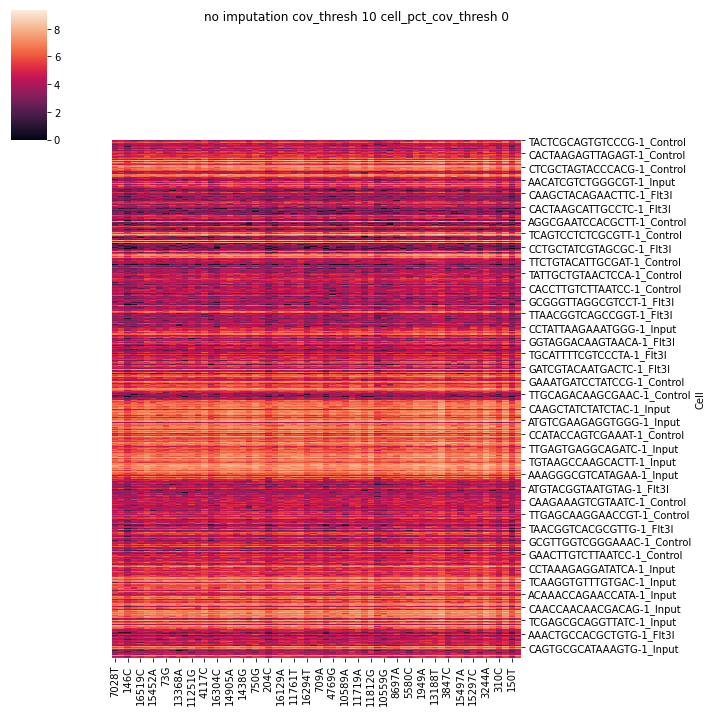

In [54]:
cell_pct_cov_thresh = 0
cov_thresh = 10
imp_df, g_pile = impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)

mean 0.9877906051262693
mean 0.9871723493645913
mean 0.9228806194538104
mean 0.9888840799062872
mean 0.9865907122164924
mean 0.987523846571169
mean 0.9892447407125045
mean 0.9888787455000702
mean 0.9990116180439115
mean 0.9882716884416933
mean 0.9888706019073833
mean 0.9884426134478256
mean 0.9875370302664764
mean 0.9867138373131111
mean 0.9868393975560631
mean 0.9881588332786811
mean 0.9986834926605423
mean 0.5891085641395176
mean 0.8893092691042845
mean 0.9987448489201166


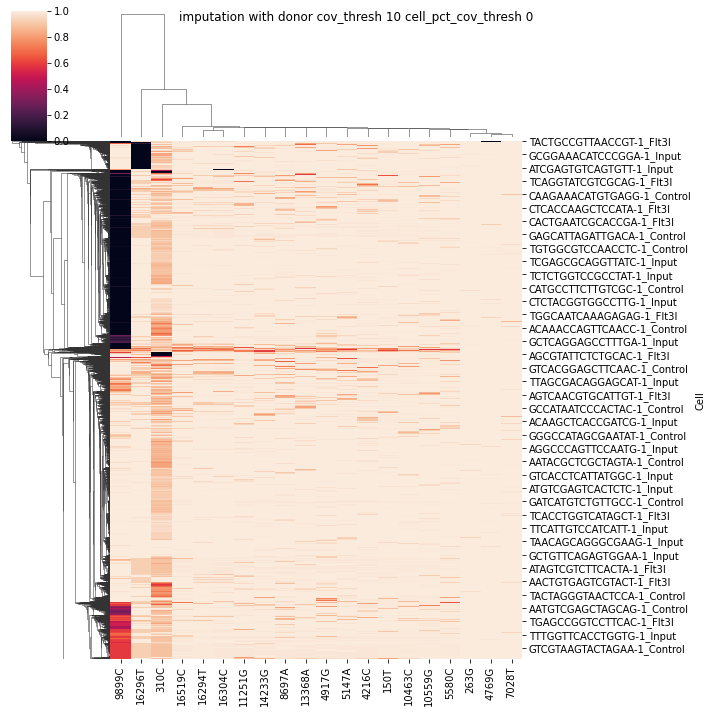

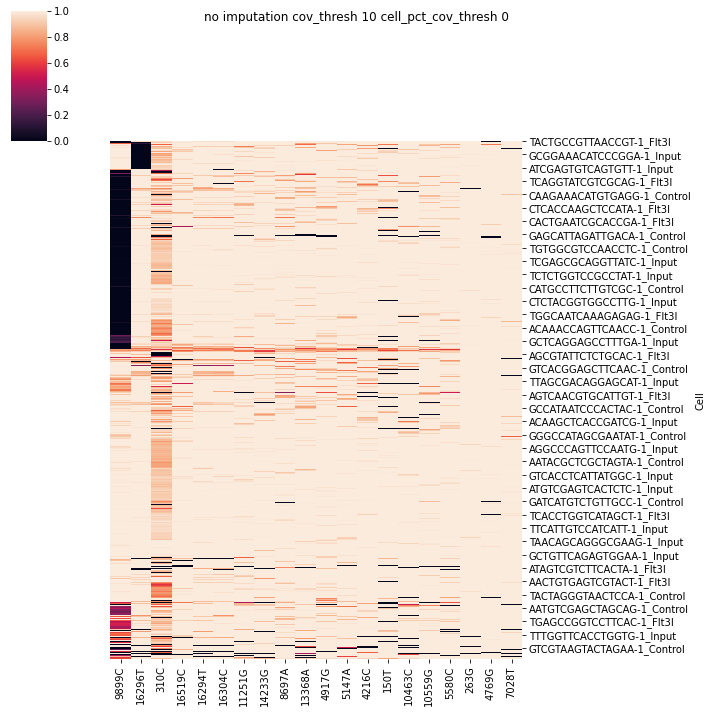

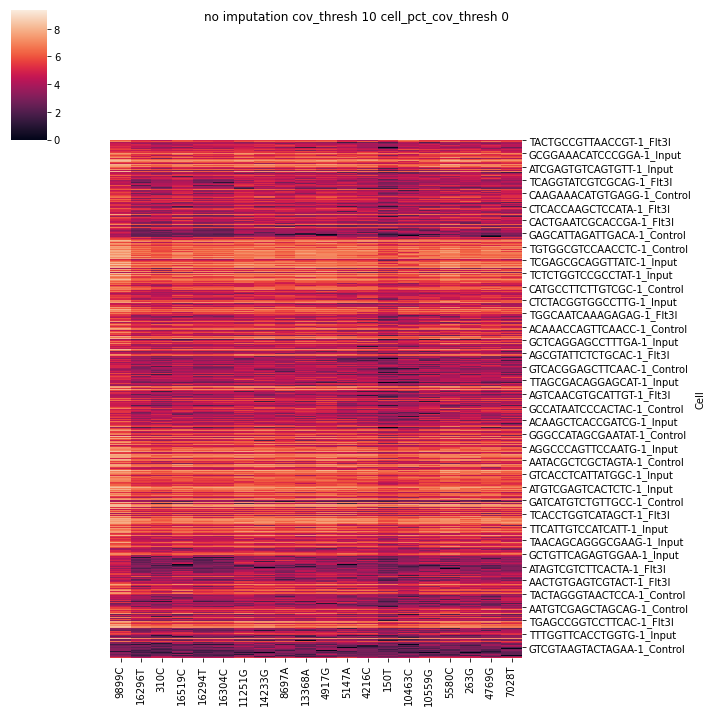

In [58]:
diff_vars_impute = np.abs(imp_df-af_pile).sum().sort_values()[::-1].index
_, g_pile = impute_and_plot(af_pile.loc[:, diff_vars_impute[:20]], 
                            dp_pile.loc[:, diff_vars_impute[:20]], cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)

10397G    0.198671
10463C    0.224532
10559G    0.169184
10589A    0.169063
11251G    0.104290
            ...   
8461T     0.062961
8697A     0.121692
8860G     0.083505
930A      0.106949
9899C     0.054622
Length: 64, dtype: float64
variant low coverage 3109C
variant low coverage 4216C
variant low coverage 2623G
variant low coverage 14233G
variant low coverage 16296T
variant low coverage 10559G
variant low coverage 16126C
variant low coverage 1949A
variant low coverage 10589A
variant low coverage 7598A
variant low coverage 930A
variant low coverage 10397G
variant low coverage 11761T
variant low coverage 11812G
variant low coverage 1888A
variant low coverage 196C
variant low coverage 15497A
variant low coverage 2706G
variant low coverage 8697A
variant low coverage 15326G
variant low coverage 64T
variant low coverage 15607G
variant low coverage 3244A
variant low coverage 150T
variant low coverage 4917G
variant low coverage 73G
variant low coverage 10463C
variant low coverage 263G
vari

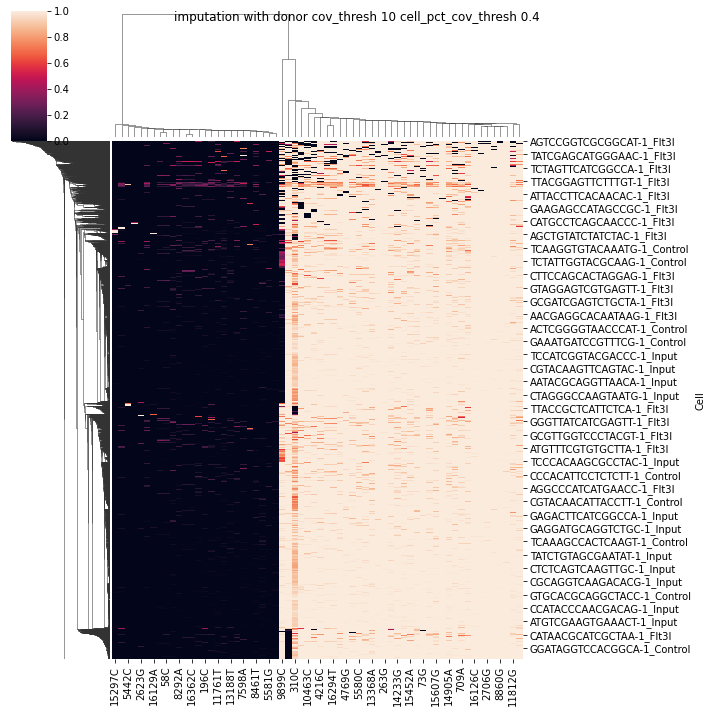

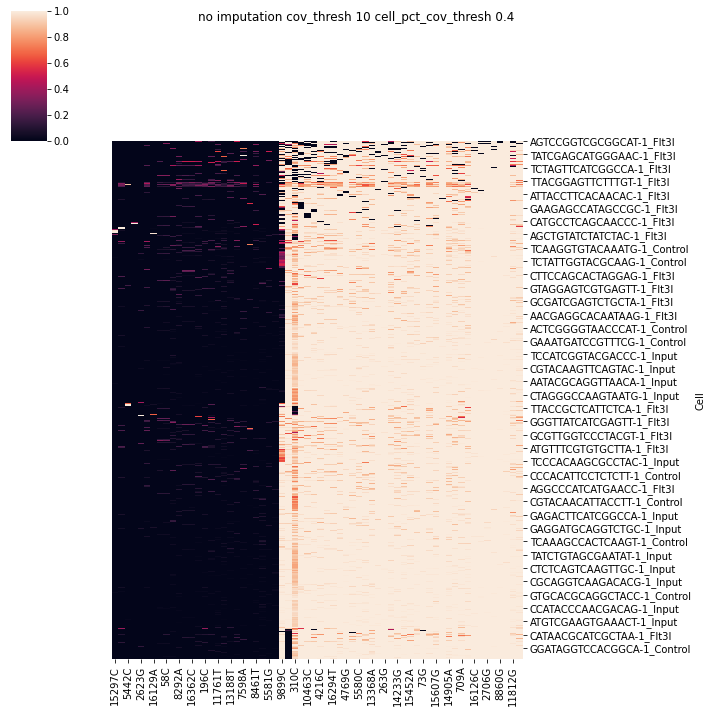

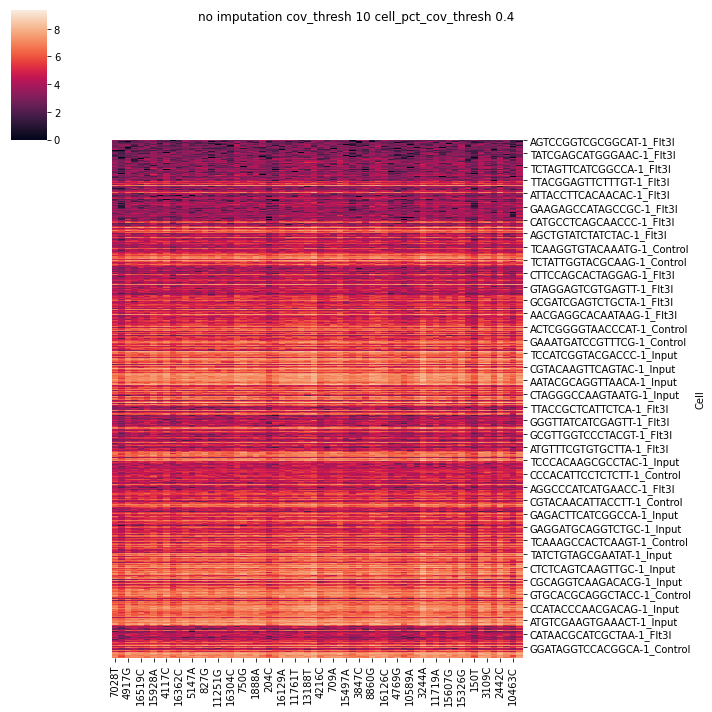

In [62]:
cell_pct_cov_thresh = 0.4
cov_thresh = 10
imp_df, g_pile = impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)

10559G    0.0
16296T    0.0
2623G     0.0
8292A     0.0
64T       0.0
         ... 
14766T    0.0
15326G    0.0
16304C    0.0
8860G     0.0
10397G    0.0
Length: 64, dtype: float64
10559G    0.169184
16296T    0.172326
2623G     0.129547
8292A     0.110937
64T       0.138006
13188T    0.071178
15497A    0.118429
1888A     0.095710
9899C     0.054622
263G      0.134502
16129A    0.084955
14905A    0.066465
4769G     0.154441
3244A     0.055831
709A      0.094622
7028T     0.155891
16126C    0.083021
10589A    0.169063
150T      0.284350
204C      0.225257
dtype: float64
variant low coverage 2623G
variant low coverage 16296T
variant low coverage 10559G
variant low coverage 16126C
variant low coverage 10589A
variant low coverage 1888A
variant low coverage 15497A
variant low coverage 64T
variant low coverage 3244A
variant low coverage 150T
variant low coverage 263G
variant low coverage 8292A
variant low coverage 204C
variant low coverage 14905A
variant low coverage 13188T
variant low cover

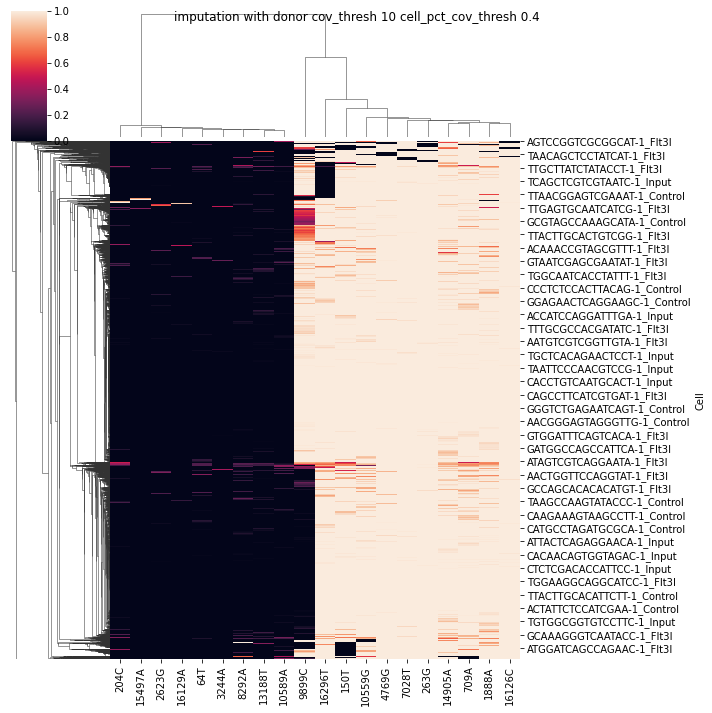

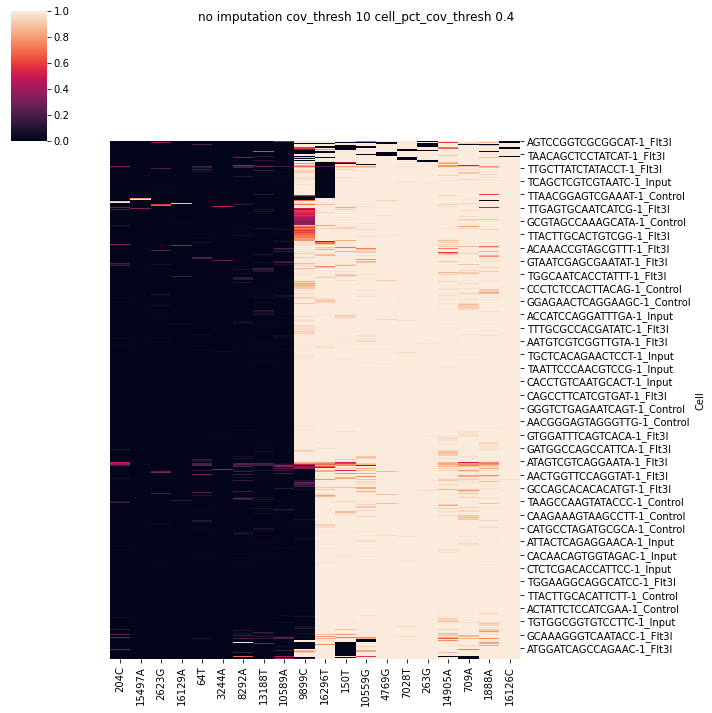

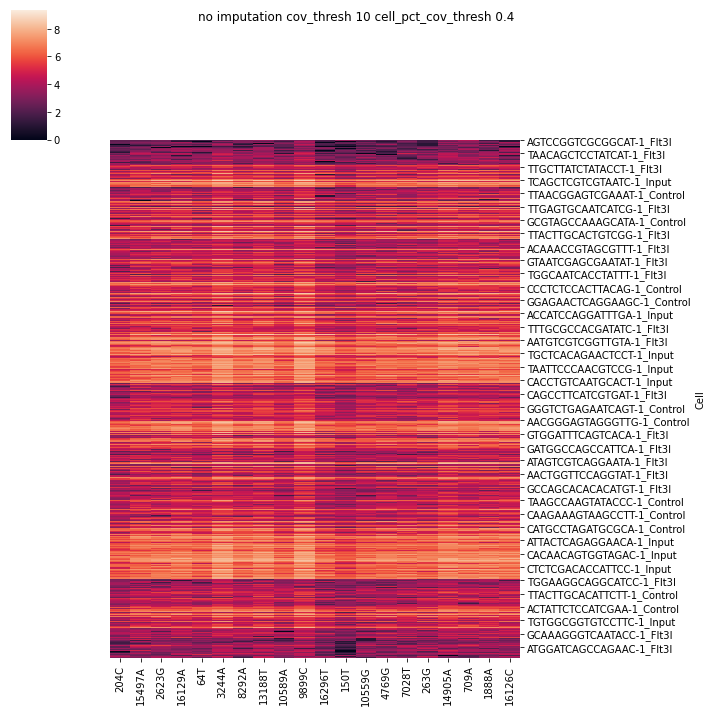

In [63]:
diff_vars_impute = np.abs(imp_df-af_pile).sum().sort_values()[::-1]
print(diff_vars_impute)
diff_vars_impute = diff_vars_impute.index
_, g_pile = impute_and_plot(af_pile.loc[:, diff_vars_impute[:20]], 
                            dp_pile.loc[:, diff_vars_impute[:20]], cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)

0.0

10397G    0.082175
10463C    0.102961
10559G    0.071782
10589A    0.067674
11251G    0.034924
            ...   
8461T     0.017039
8697A     0.043505
8860G     0.027795
930A      0.037341
9899C     0.015831
Length: 64, dtype: float64
variant low coverage 3109C
variant low coverage 4216C
variant low coverage 2623G
variant low coverage 14233G
variant low coverage 16296T
variant low coverage 10559G
variant low coverage 16126C
variant low coverage 1949A
variant low coverage 10589A
variant low coverage 7598A
variant low coverage 930A
variant low coverage 10397G
variant low coverage 11761T
variant low coverage 11812G
variant low coverage 1888A
variant low coverage 196C
variant low coverage 15497A
variant low coverage 2706G
variant low coverage 8697A
variant low coverage 15326G
variant low coverage 64T
variant low coverage 15607G
variant low coverage 3244A
variant low coverage 150T
variant low coverage 4917G
variant low coverage 73G
variant low coverage 10463C
variant low coverage 263G
vari

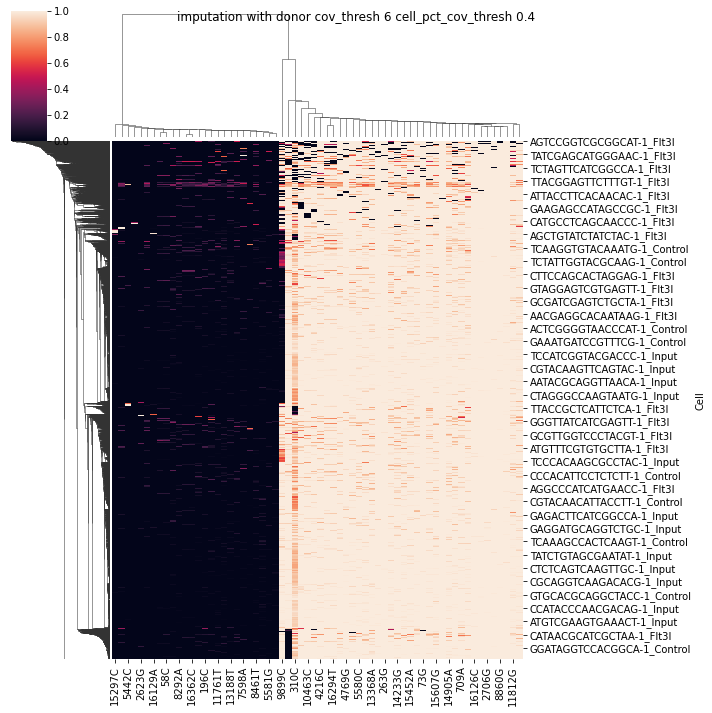

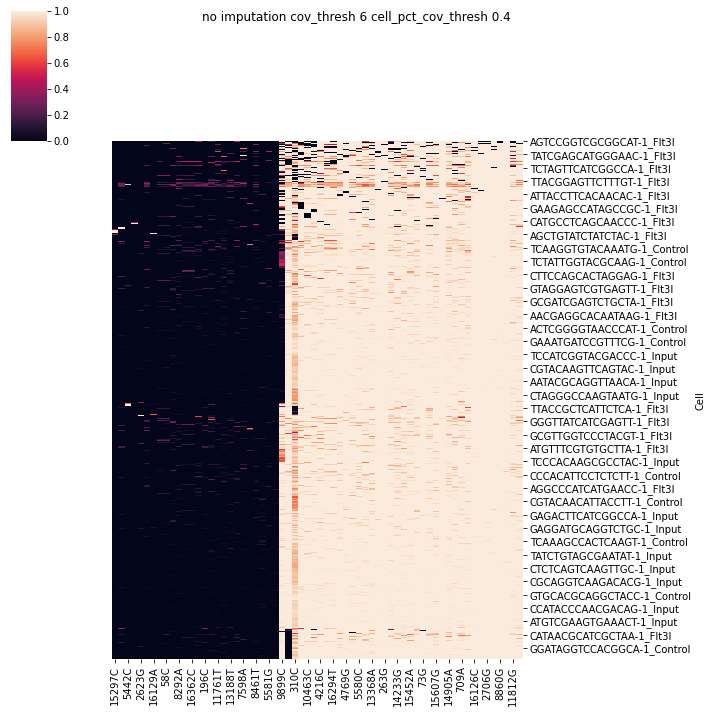

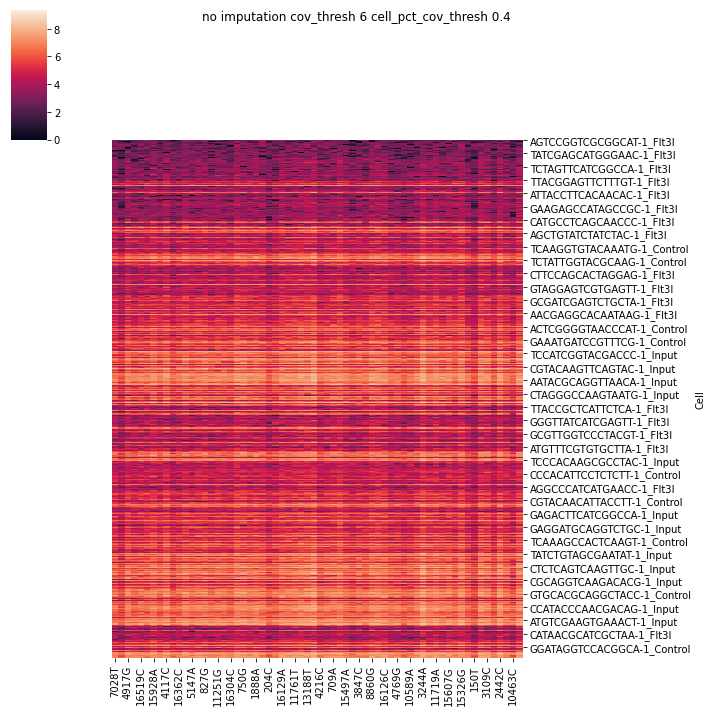

In [68]:
cell_pct_cov_thresh = 0.4
cov_thresh = 6
imp_df, g_pile = impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)

diff_vars_impute = np.abs(imp_df-af_pile).sum().sort_values()[::-1]
print(diff_vars_impute)
if not (np.abs(imp_df-af_pile).sum().sort_values()[::-1].sum()==0):

    diff_vars_impute = diff_vars_impute.index
    _, g_pile = impute_and_plot(af_pile.loc[:, diff_vars_impute[:20]], 
                                dp_pile.loc[:, diff_vars_impute[:20]], cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)
else:
    print('no imputation done')

variant low coverage 3109C
variant low coverage 4216C
variant low coverage 2623G
variant low coverage 14233G
variant low coverage 16296T
variant low coverage 10559G
variant low coverage 16126C
variant low coverage 1949A
variant low coverage 10589A
variant low coverage 7598A
variant low coverage 930A
variant low coverage 10397G
variant low coverage 11761T
variant low coverage 11812G
variant low coverage 1888A
variant low coverage 196C
variant low coverage 15497A
variant low coverage 2706G
variant low coverage 8697A
variant low coverage 15326G
variant low coverage 64T
variant low coverage 15607G
variant low coverage 3244A
variant low coverage 150T
variant low coverage 4917G
variant low coverage 73G
variant low coverage 10463C
variant low coverage 263G
variant low coverage 3847C
variant low coverage 5581G
variant low coverage 15928A
variant low coverage 15452A
variant low coverage 16304C
variant low coverage 5580C
variant low coverage 8860G
variant low coverage 58C
variant low coverage 14

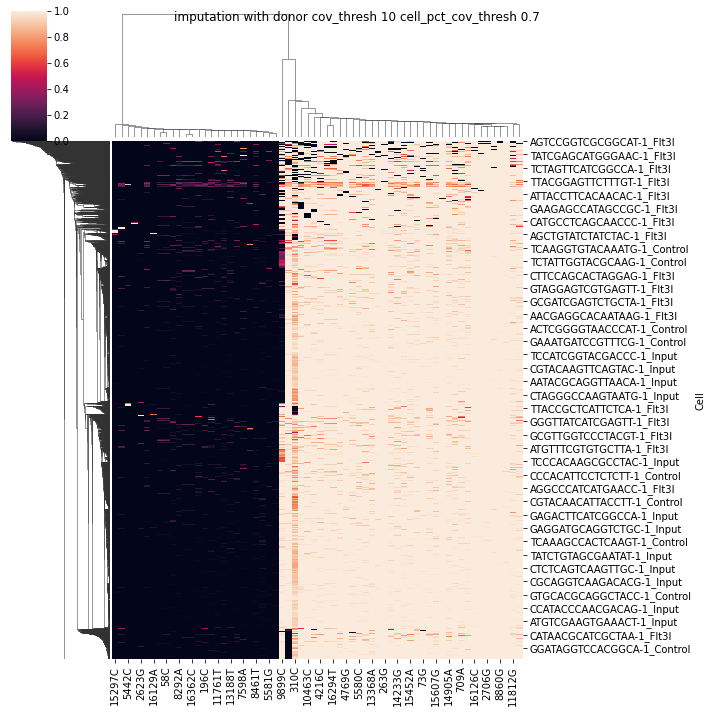

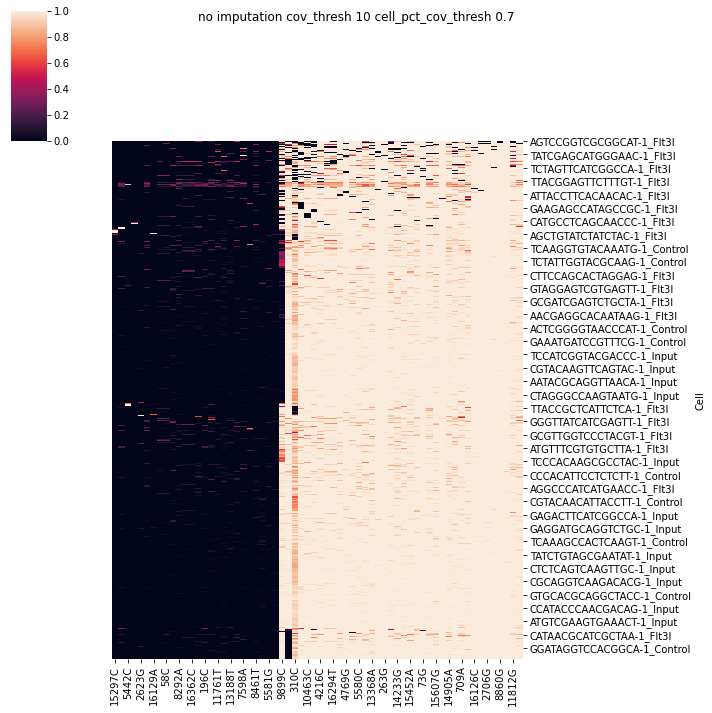

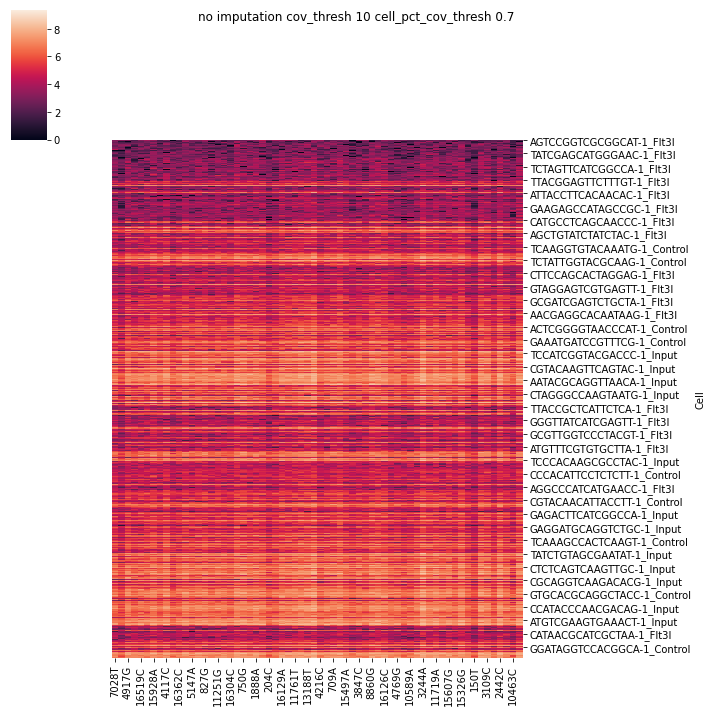

In [48]:
cell_pct_cov_thresh = 0.7
cov_thresh = 10
imp_df, g_pile = impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)

diff_vars_impute = np.abs(imp_df-af_pile).sum().sort_values()[::-1].index
_, g_pile = impute_and_plot(af_pile.loc[:, diff_vars_impute[:20]], 
                            dp_pile.loc[:, diff_vars_impute[:20]], cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)

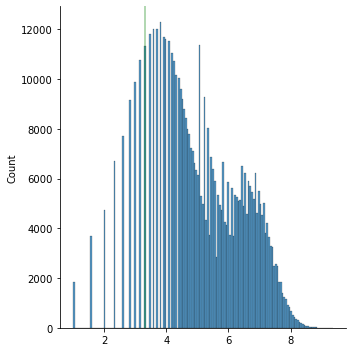

In [25]:
flat_dp = dp_pile.values.flatten()
flat_dp = flat_dp[flat_dp!=0]
sns.displot(np.log2(1+flat_dp))
#plt.gca().set_ylim([0, 400000])
plt.axvline(np.log2(10), color='green', alpha=0.4)

In [72]:
cells_meta = pd.DataFrame(index=dp_pile.index, data={"condition":[x.split("_")[-1] for x in dp_pile.index]})
cells_meta

,condition
Cell,
AAACGAAAGAATCAGT-1_Control,Control
AAACGAAAGCATACCT-1_Control,Control
AAACGAAAGTACAGTA-1_Control,Control
AAACGAAAGTGTCGGA-1_Control,Control
AAACGAAGTCTTAGCA-1_Control,Control
...,...
TTTGTGTCAATGACTC-1_Input,Input
TTTGTGTCAGAAAGAG-1_Input,Input
TTTGTGTCATAGCCAT-1_Input,Input


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


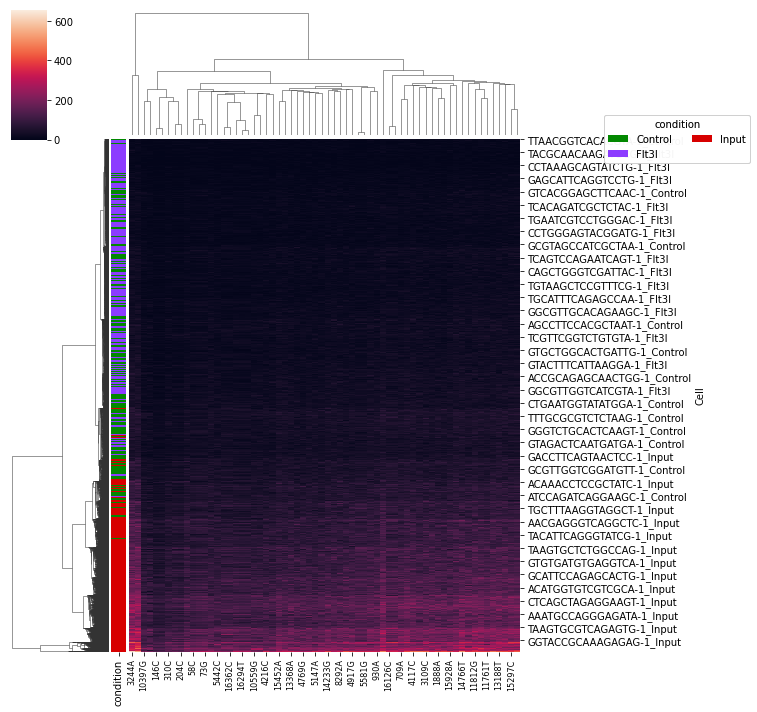

In [76]:
import mplh.cluster_help as ch
ch.plot_cluster(df=dp_pile, row_meta=cells_meta, row_clr_schemes='categorical')

In [14]:
# curr_af_pile = af_pile.loc[overlap_cells, overlap_vars_to_keep_pile].transpose()
# curr_af = af[val].loc[overlap_vars_to_keep, overlap_cells]
# curr_af_pile
# curr_af.index = [f'{x.split(">")[0][:-1]}{x.split(">")[1]}' for x in curr_af.index]
# curr_af

# max_diff = np.abs(curr_af - curr_af_pile).sum(axis=1).sort_values()[::-1]
# max_diff

# f, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(curr_af.loc[max_diff.index[:2]])
# f, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(curr_af_pile.loc[max_diff.index[:2]])



# ## With both variants

# g_pile = sns.clustermap(af_pile.loc[:, af_pile.columns.isin(vars_to_keep_pile)].transpose())

# g_mgatk = sns.clustermap(af[val].loc[af[val].index.isin(vars_to_keep), :])

In [15]:
# for d, curr_donor in cells_meta.groupby('donor'):
#     d = int(d)
#     ic('donor', d)
#     vars_conds = []
#     af_donor_conds = []
#     dp_donor_conds = []

#     # Loop through each condition and filter cells for the donor ones
#     for ind, curr_cov_f in enumerate(cov): #enumerate(snakemake.input.cov):
        
#         ## AF
#         af = pd.read_csv(join(dirname(curr_cov_f), "af_by_cell.tsv"), sep='\t',
#                          header=0, index_col=0) #cells-by-variants
#         condition = sample[ind]
#         ic(condition)
        
#         af.index = af.index + "_" + condition
# #         print('af')
# #         print(af.head())
#         curr_samp_donor_df = curr_donor[curr_donor["condition"] == condition]  # Condition-donors
#         af_donor_samp = af.loc[af.index.isin(curr_samp_donor_df["ID"].values)]
#         ic(af_donor_samp.shape)
#         af_donor_samp = af_donor_samp.loc[((af_donor_samp > 0).sum(axis=1)>10), ((af_donor_samp > 0).sum(axis=0)>10)] #af_donor_samp.loc[(af_donor_samp.sum(axis=1) > 0), (af_donor_samp.sum(axis=0) > 0)]
#         vars_conds.append(set(af_donor_samp.columns))
#         af_donor_conds.append(af_donor_samp)
#         ic(curr_cov_f)
#         ic(af_donor_samp.shape)
#         ## Coverage
#         curr_samp_cov = pd.read_csv(curr_cov_f,
#                                     header=None)  # load sample coverage
#         curr_samp_cov[1] = curr_samp_cov[1] + "_" + sample[ind]
#         curr_samp_cov = curr_samp_cov.loc[
#             curr_samp_cov[1].isin(curr_samp_donor_df["ID"])]
#         curr_samp_cov = curr_samp_cov.rename({1: "Cell", 0: "Position", 2: "Value"}, axis=1).pivot(index="Cell",
#                                                                                                   columns="Position",
#                                                                                                   values="Value")
#         dp_donor_samp = pd.DataFrame(index=af_donor_samp.index, columns=af_donor_samp.columns)

#         def fill_dp(x,y):
#             #print('x', x)
#             #print('y', y.head())
#             return y.loc[y.index.isin(x.index), int(x.name[:-1])].values

#         dp_donor_samp = dp_donor_samp.apply(fill_dp, args=(curr_samp_cov,))

#         print('null dp', dp_donor_samp.isnull().sum().sum())
#         #dp_donor_samp = dp_donor_samp.loc[dp_donor_samp.index.isin(af_donor_samp.index), dp_donor_samp.columns.isin([int(x[:-1] ) for x in af_donor_samp.columns])]
#         dp_donor_conds.append(dp_donor_samp)

#     # Get overlap variants and remove cells/vars with 0s
#     if var_type == "simpleUnion":
#         join_type = "outer"
#         overlap_vars = vars_conds[0].union(*vars_conds)
#     else:
#         join_type="inner"
#         overlap_vars = vars_conds[0].intersection(*vars_conds)
#     print(join_type)
#     #overlap_vars = vars_conds[0].union(*vars_conds)
#     print('overlap_vars', len(overlap_vars))
#     af_donor_df = pd.concat(af_donor_conds, join=join_type, axis=0,
#                                                 ignore_index=False)
#     print('af_donor_df', af_donor_df.shape)
#     af_donor_df = af_donor_df.loc[:, overlap_vars]
#     print('af_donor_df after using overlap vars', af_donor_df.shape)
#     af_donor_df = af_donor_df.loc[(af_donor_df.sum(axis=1)>0), (af_donor_df.sum(axis=0)>0)]
#     print('af_donor_df after 0 removal', af_donor_df.shape)

#     #print('af_donor_df')
#     #print(af_donor_df.head())
#     dp_donor_df = pd.concat(dp_donor_conds, join=join_type, axis=0,
#                                                 ignore_index=False).fillna(0)
#     dp_donor_df = dp_donor_df.loc[dp_donor_df.index.isin(af_donor_df.index), dp_donor_df.columns.isin(af_donor_df.columns)]
#     #print('dp_donor_df')

#     # Save allele + depth matrix + cells_meta
#     af_donor_df.fillna(0).to_csv(join(dirname(output_fs[int(d)]), "af.tsv"),
#                        sep='\t', index=True)
#     dp_donor_df.fillna(0).to_csv(join(dirname(output_fs[int(d)]), "dp.tsv"),
#                        sep='\t', index=True)

#     curr_cells_meta = cells_meta[cells_meta["ID"].isin(af_donor_df.index)].copy()
#     curr_cells_meta.to_csv(join(dirname(output_fs[int(d)]), "cells_meta.tsv"),
#                           sep='\t', index=False)

#     # Create VireoIn
#     # Requires AD sparse matrix
#     af_donor_df = af_donor_df.fillna(0)
#     dp_donor_df = dp_donor_df.fillna(0)
#     af_to_vireo(af_donor_df.transpose(), dp_donor_df.transpose(),
#                 outdir=dirname(output_fs[int(d)]),
#                 out_name="cellSNP")

#     curr_vars = af_donor_df.columns

#     af_meta = pd.DataFrame({"POS": [int(x[:-1]) for x in curr_vars],
#                                                     "ALT": [x[-1] for x in curr_vars],
#                                                     "index": np.arange(1,len(curr_vars)+1),
#                                                     "REF": [f"{ref_fa.loc[int(x[:-1]),1]}{x[:-1]}" for x in curr_vars]
#                                                 }
#                                             )
#     af_meta["#CHROM"] = "MT"
#     af_meta[["#CHROM", "POS", "REF","ALT", "index"]].to_csv(join(dirname(output_fs[d]), "cellSNP.base.vcf"),
#                    sep="\t", index=False)


In [16]:
# print(dp_donor_df.shape)
# dp_donor_df.loc[(dp_donor_df.sum(axis=1)>0), (dp_donor_df.sum(axis=0)>0)].shape
# (dp_donor_df.sum(axis=1) > 1000).sum()

In [17]:
# print(af_donor_df.shape)
# af_donor_df.loc[(af_donor_df.sum(axis=1)>0), (af_donor_df.sum(axis=0)>0)].shape
# (af_donor_df.sum(axis=1) > 0).sum()

## Load mgatk results for each condition

In [18]:
# af_mgatk = {}
# af = {}
# cov = {}
# for ind, cond in enumerate(sample):
#     print(ind)
#     af_mgatk[cond] = pd.read_csv(join(mgatk_fs[ind], f"{cond}.af.mgatk.tsv"), sep="\t")
#     af[cond] = pd.read_csv(join(mgatk_fs[ind], f"{cond}.af.tsv"), sep="\t")
#     cov[cond] = pd.read_csv(join(mgatk_fs[ind], f"{cond}.coverage.tsv"), sep="\t")
    
#     af[cond].columns = [f"{x}_{cond}" for x in af[cond].columns]
#     cov[cond].columns = [f"{x}_{cond}" for x in cov[cond].columns]

#     ## Run for each condition
#     vars_to_keep = []
#     for val in af_mgatk:
#         vars_to_keep.extend(af_mgatk[cond].index.values)
#     vars_to_keep=list(set(vars_to_keep))
#     vars_to_keep

#     ## Change variant to remove '{ref}>'
#     vars_to_keep_pile = []
#     for v in vars_to_keep:
#         curr = v.split(">")
#         name = f"{curr[0][:-1]}{curr[1]}"
#         vars_to_keep_pile.append(name)
#     vars_to_keep_pile = vars_to_keep_pile
#     vars_to_keep_pile

#     overlap_vars_to_keep_pile = []
#     overlap_vars_to_keep = []
#     for ind, v in enumerate(vars_to_keep):
#         if v in af[cond].index:
#             if vars_to_keep_pile[ind] in af_pile.columns:
#                 overlap_vars_to_keep_pile.append(vars_to_keep_pile[ind])
#                 overlap_vars_to_keep.append(v)

#     ## With just overlap variants

#     overlap_cells = set(af[val].columns.values)
#     overlap_cells = overlap_cells.intersection(set(af_pile.index.values))
#     overlap_cells

#     g_pile = sns.clustermap(af_pile.loc[overlap_cells, overlap_vars_to_keep_pile].transpose(), col_cluster=False)
#     plt.suptitle("Without imputation")
#     #inds = g_pile.dendrogram_row.dendrogram["leaves"]
#     #cols = g_pile.dendrogram_col.dendrogram["leaves"]
#     g_mgatk = sns.clustermap(af[val].loc[overlap_vars_to_keep, overlap_cells], col_cluster=False)
#     plt.suptitle("With mean imputation for cov<10")


#     # donor_vars = get_high_variants(af[val].loc[af[val].index.isin(vars_to_keep), :].transpose(), thresh=0.8, pct_thresh=0.4)
#     # print(f"number of donor vars: {len(donor_vars)}")

#     donor_vars_pile = get_high_variants(af_pile.loc[:, af_pile.columns.isin(vars_to_keep_pile)], thresh=0.8, pct_thresh=0.7)
#     print(f"number of donor vars: {len(donor_vars_pile)}")

#     donor_vars = []
#     for ind, v in enumerate(vars_to_keep_pile): 
#         if v in donor_vars_pile:
#             donor_vars.append(vars_to_keep[ind])
#     print(len(donor_vars))
#     donor_vars

#     curr_af_pile = af_pile.loc[overlap_cells, overlap_vars_to_keep_pile].transpose()
#     curr_af_pile = curr_af_pile.loc[~(curr_af_pile.index.isin(donor_vars_pile)),:]
#     #curr_af_pile = curr_af_pile.loc[]
#     curr_af = af[val].loc[overlap_vars_to_keep, overlap_cells]
#     curr_af = curr_af.loc[~(curr_af.index.isin(donor_vars)), :]

#     g_pile = sns.clustermap(curr_af_pile, col_cluster=False)
#     plt.suptitle(f"{cond} Without imputation")
#     inds = g_pile.dendrogram_row.dendrogram["leaves"]
#     #cols = g_pile.dendrogram_col.dendrogram["leaves"]
#     g_mgatk = sns.clustermap(curr_af.iloc[inds], col_cluster=False)
#     plt.suptitle(f"{cond} With mean imputation for cov<10")

#     sns.clustermap(np.log10(1+cov[cond]))
#     plt.suptitle(f"{cond} coverage")

In [19]:
# imp_df
# curr_af = imp_df.loc[overlap_cells, overlap_vars_to_keep_pile]
# #curr_af = curr_af.loc[:, ~(curr_af.columns.isin(donor_vars))]

# g_pile = sns.clustermap(curr_af_pile, col_cluster=False)
# plt.suptitle(f"{cond} imputation with donor")
